In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from google.colab import files
from google.colab import files

In [2]:
uploaded = files.upload()
data = pd.read_excel('ecommerce_product_dataset.xlsx')

print("Top of the Data:")
print(data.head())

print("Statistics Summary:")
print(data.describe())

Saving ecommerce_product_dataset.xlsx to ecommerce_product_dataset.xlsx
Top of the Data:
   ProductID ProductName     Category   Price  Rating  NumReviews  \
0          1  Headphones  Electronics  400.31     1.7        3772   
1          2  Headphones  Electronics  235.03     2.3        2919   
2          3  Smartwatch  Electronics  417.90     1.8        1184   
3          4  Smartphone  Electronics  152.70     3.4        2047   
4          5      Laptop  Electronics  394.74     1.8        1267   

   StockQuantity  Discount  Sales  DateAdded         City  
0             20      0.08    466 2023-11-10  Albuquerque  
1            663      0.33   1332 2023-09-28       Queens  
2            459      0.31    252 2023-10-20       Austin  
3            475      0.49   1806 2023-12-05       Dallas  
4            831      0.23   1508 2023-08-10       Tucson  
Statistics Summary:
         ProductID       Price       Rating   NumReviews  StockQuantity  \
count  1000.000000  1000.00000  1000.0000

In [3]:
#Pie Chart for Category
fig = px.pie(data, names = 'Category', title = 'Proportion of Product Categories')
fig.show()

Based on the chart, the proportion of each category had the same value.

<ipython-input-4-21be1f400de4>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




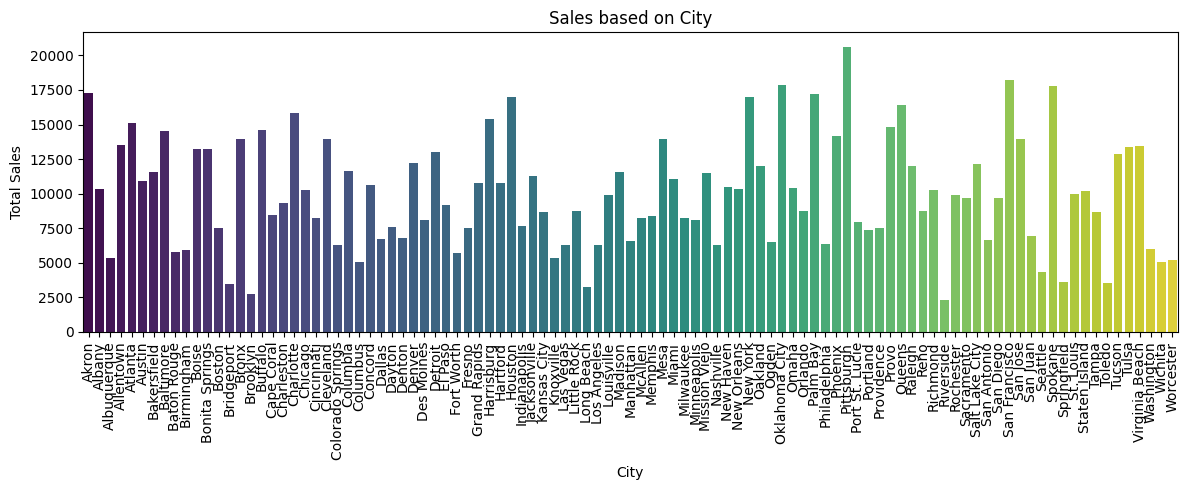

In [4]:
#Bar chart of Total Sales in Cities
plt.figure(figsize=(12,5))
sns.barplot(
    data=data.groupby('City')['Sales'].sum().reset_index(),
    x='City',
    y='Sales',
    palette='viridis')
plt.title('Sales based on City')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Based on the chart, the largest sales were in the City of Pittsburgh with total sales of around 20000 and the least were the City of Riverside with sales of around 2500.

In [5]:
#Area Chart of Sales Over Time
data['DateAdded'] = pd.to_datetime(data['DateAdded'])
sales_period = data.groupby(data['DateAdded'].dt.to_period('M')).agg({'Sales': 'sum'}).reset_index()
sales_period['DateAdded'] = sales_period['DateAdded'].dt.to_timestamp()

fig = px.area(sales_period, x='DateAdded', y='Sales', title='Sales Over Time')
fig.show()

Based on the chart, it can be seen that sales underwent fluctuation with the highest sales in July 2023 and the lowest in February 2024.

In [6]:
#Area Chart of Stock Quantity Over Time
data['DateAdded'] = pd.to_datetime(data['DateAdded'])
sales_period = data.groupby(data['DateAdded'].dt.to_period('M')).agg({'StockQuantity': 'sum'}).reset_index()
sales_period['DateAdded'] = sales_period['DateAdded'].dt.to_timestamp()

fig = px.area(sales_period, x='DateAdded', y='StockQuantity', title='Number of Stock Quantity Over Time')
fig.show()

Based on the chart, it can be seen that stock quantity underwent fluctuation with the highest quantity in November 2023 and the lowest in February 2024.

In [7]:
#Histogram of Distribution of Price
fig = px.histogram(data, x='Price', nbins=50, title='Distribution of Price')
fig.show()

Based on the chart, it can be seen that price underwent fluctuation with the highest number in price of 200-209,99 (39) and the lowest in price of 140-149,99 (7).

In [8]:
#Line Chart of Price and Time
data['YearMonth'] = data['DateAdded'].dt.to_period('M')
stock_over_time = data.groupby(['YearMonth', 'Category']).agg({'Price': 'mean'}).reset_index()
stock_over_time['YearMonth'] = stock_over_time['YearMonth'].dt.to_timestamp()

fig = px.line(stock_over_time, x='YearMonth', y='Price', color='Category', title='Price Over Time')
fig.update_layout(xaxis_title='Time', yaxis_title='Price')
fig.show()

Based on the chart, it can be seen that all categories underwent fluctuation.

In [9]:
#Line Chart of Stock Quantity and Time
data['YearMonth'] = data['DateAdded'].dt.to_period('M')
stock_over_time = data.groupby(['YearMonth', 'Category']).agg({'StockQuantity': 'mean'}).reset_index()
stock_over_time['YearMonth'] = stock_over_time['YearMonth'].dt.to_timestamp()

fig = px.line(stock_over_time, x='YearMonth', y='StockQuantity', color='Category', title='Stock Quantity Over Time')
fig.update_layout(xaxis_title='Time', yaxis_title='Stock Quantity')
fig.show()

Based on the chart, it can be seen that all categories underwent fluctuation.

In [11]:
#Scatter Plot of Rating and Review by Category
fig = px.scatter(data, x='NumReviews', y='Rating', color='Category', title='Rating and Review by Category')
fig.show()

Based on the plot, it can be seen that the highest rating was Socks (3,51) with 92,8k reviwes and the lowest rating was Makeup (2,75) with 97,64k reviews.


In [12]:
#Scatter Plot of Price and Sales by Category
fig = px.scatter(data, x='Sales', y='Discount', color='Category', title = 'Price and Sales by Category')
fig.show()

Based on the plot, it can be seen that the highest sales was Mobile phone accessories (1997) with rating of 0,42 and the lowest sales was Art and crafting materials (0) with rating of 0,42.

In [13]:
#Radar Chart of Total Sales by Category
sales_category = data.groupby('Category').agg({'Sales' : 'sum'}).reset_index()
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
    r = sales_category ['Sales'],
    theta = sales_category['Category'],
    fill = 'toself',
    name = 'Total Sales'
))
fig.update_layout(
    polar = dict(
        radialaxis = dict(
            visible=True,
            range=[0,60000]
        )),
    showlegend=False,
    title='Total Sales by Category'
)
fig.show()

Based on the chart, it can be seen that the highest sales were:
*   Art and crafting materials
*   Vitamins and supplements
*   Bedsheets
*   Motor vehicle parts

with the sales approximately 45k and the lowest sales were:
*   Underwear
*   Candles

with the sales approximately 35k.

In [14]:
#Bar Chart of Top 15 Products by Sales
top_product = data.groupby('ProductName').agg({'Sales' : 'sum'}).reset_index().sort_values(by='Sales', ascending = True).head(15)
fig = px.bar(top_product, x='Sales', y='ProductName', orientation='h', title='Top 15 Products by Sales')
fig.show()

Based on the chart, the highest product by sales was Coffee Mug with 6838 sales.

In [15]:
#Bar chart of Top 15 Products by Rating
top_product1 = data.groupby('ProductName').agg({'Rating' : 'mean'}).reset_index().sort_values(by='Rating', ascending = True).head(15)
fig = px.bar(top_product1, x='Rating', y='ProductName', orientation='h', title='Top 15 Products by Rating')
fig.show()

Based on the chart, the highest product by rating was Shower Gel with rating of 2,65.

In [16]:
#Boxplot of Sales Distributin by Category
fig = px.box(data, x='Category', y='Sales', title = 'Sales Distributin by Category', color = 'Category')
fig.show()

Based on the plot, we can see data concentration measures, including: minimum sales value, lower fence, quartile 1 (25%), median (50%), quartile 3 (75%), upper hence, up to the maximum value for each category.

In [17]:
#Boxplot of Number of Review Distributin by Category
fig = px.box(data, x='Category', y='NumReviews', title = 'Number of Reviews Distributin by Category', color = 'Category')
fig.show()

Based on the plot, we can see data concentration measures, including: minimum number of reviews value, lower fence, quartile 1 (25%), median (50%), quartile 3 (75%), upper hence, up to the maximum value for each category.

In [18]:
#Correlation of Variables
correlation = data.select_dtypes(include=['float64', 'int64']).corr()
fig = px.imshow(correlation, text_auto=True, aspect="auto", title='Correlation Matrix Heatmap')
fig.show()

Based on Heatmap of correlation matrix, it can be seen correlation between variables. If the correlation value is positive, if one variable increases, then the other variables will increase as well. However, if the correlation value is negative, if one variable increases, the other variable will decrease.
# **1.   Price**
*   Negatively correlated with Rating
*   Positively correlated with Number of Reviews
*   Negatively correlated with Stock Quantity
*   Negatively correlated with Discount
*   Positively correlated with Sales
# **2.   Rating**
*   Negatively correlated with Number of Reviews
*   Positively correlated with Stock Quantity
*   Positively correlated with Discount
*   Positively correlated with Sales
# **3.   Number of Reviews**
*   Negatively correlated with Stock Quantity
*   Negatively correlated with Discount
*   Positively correlated with Sales
# **4.   Stock Quantity**
*   Negatively correlated with Discount
*   Negatively correlated with Sales
# **5.   Discount**
*   Positively correlated with Sales









In [19]:
#Heatmap of Sales by City and Category
sales_city_category = data.pivot_table(values='Sales', index='City', columns='Category', aggfunc='sum', fill_value=0)
fig = px.imshow(sales_city_category, aspect="auto", title='Sales Based on City and Category', labels=dict(color="sales"))
fig.show()

Based on the Heatmap, we can see sales by category and city. The brighter the color, the higher the sales. The highest sales of the following categories were in the city:
1. **Art and Crafting materials** - Virginia Beach (3685)
2. **Bath and Body** - Allentown (3235)
3. **Bedsheets** - Cape Coral (3028)
4. **Bicycle** - Richmond (4409)
5. **Blankets** - Staten Island (2883)
6. **Books** - Port St. Lucie (4061)
7. **Candles** - Housten (2394)
8. **Clothing** - Louisville (2053)
9. **Coats and Jackets** - Boise (3188)
10. **Cookware** - Salt Lake Air (3932)
11. **Drinkware** - Concord (2624)
12. **Electronics** - Charlotte (4352)
13. **Home & Kitchen** - Tucson (2764)
14. **Makeup** - Akron (3496)
15. **Mobile Phone Accessories** - Provo (2936)
16. **Motor Vehicle Parts** - San Jose (3415)
17. **Nail Care** - Salt Lake City (3690)
18. **Perfume and Cologne** - Harrisburg (2847)
19. **Posters and Artworks** - Palm Bay (2402)
20. **Skin care** - Palm Bay (3335)
21. **Socks** - Atlanta (3737)
22. **Toys & Games** - Miami (3484)
23. **Underwear** - Columbia (4143)
24. **Vitamins and Supplements** - Spokane (5808)
25. **Wine** - Charleston (3892)

In [20]:
# Bar Chart of City and Price
price_city = data.groupby('City').agg({'Price': 'mean'}).reset_index()

fig = px.bar(price_city, x='City', y='Price', title='Average Price by City', color='City')
fig.show()

Based on the chart, it can be seen that the product with the highest price was sold in Missin Viejo (389,4) and the product with the lowest price was sold in Miami (110,8).

In [21]:
#Violin Plot of Rating Distributin by City
fig = px.violin(data, x='City', y='Rating', box=True, points='all', title='Rating Distribution by City', color='City')
fig.show()

Based on the plot, we can see the distribution of ratings in each city.

In [22]:
# Bar Chart of Discount and Sales
discount_sales = data.groupby('Discount').agg({'Sales': 'sum',}).reset_index()

fig = px.bar(discount_sales, x='Discount', y='Sales', title='Total Sales by Discount', color='Sales')
fig.show()

Based on the graph, the highest sales were for items sold with a 0,41 discount with a total of 35486 sales and the lowest sales were for items sold with a 0 discount or no discount with a total of 5518 sales.

In [23]:
# Bar Chart of Rating and Discount
rating_review = data.groupby('Discount').agg({'Rating': 'mean',}).reset_index()

fig = px.bar(rating_review, x='Discount', y='Rating', title='Rating by Discount', color='Rating')
fig.show()

Based on the graph, the highest rating was for items sold with a 0,19 discount with rating of 3,72 and the lowest rating was for items sold with a 0 discount or no discount with rating of 2,3.

In [24]:
# Bar Chart of Stock Quantity and Discount
rating_review = data.groupby('Discount').agg({'StockQuantity': 'sum',}).reset_index()

fig = px.bar(rating_review, x='Discount', y='StockQuantity', title='Discount by Stock Quantity', color='StockQuantity')
fig.show()

Based on the graph, the highest stock quantity was at 0,41 discount with a total of 17271 items and the lowest stock quantity was at a 0 discount or no discount with a total of 3103 items.

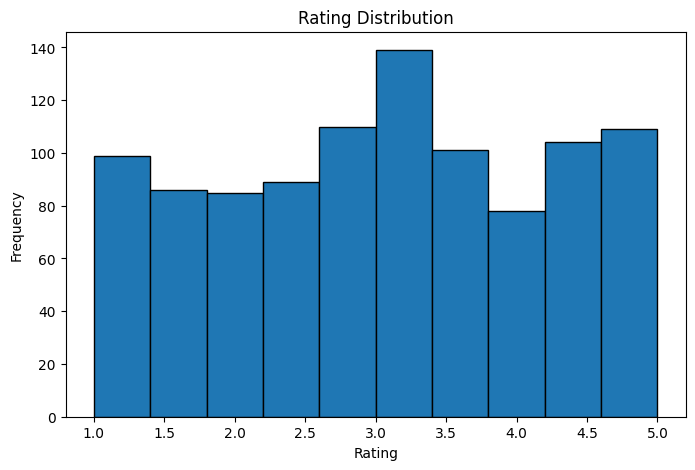

In [25]:
# Histogram of Rating Distribution
plt.figure(figsize=(8, 5))
data['Rating'].plot(kind='hist', bins=10, edgecolor='black', title='Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Based on the graph, the highest frequency was rating of 3,0-3,5 and the lowest frequency rating of 3,75-4,25.

In [26]:
# Bar Chart for Rating and Review
rating_review = data.groupby('Rating').agg({'NumReviews': 'sum',}).reset_index()

fig = px.bar(rating_review, x='Rating', y='NumReviews', title='Reviews by Rating', color='NumReviews')
fig.show()

Based on the graph, the highest number of reviews was 86523 at rating of 1,1 and the lowest number of reviews was 18065 at rating of 2,5.

In [27]:
#Tree map of Sales by Category and Product
fig = px.treemap(data, path=['Category','ProductName'], values='Sales', title='Sales by Category and Product')
fig.show()

Based on the map, we can see the sales distribution by category and product. In every category, it details sales and in every product, it details sales and category type.